# Limpieza de Datos


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv("../data/raw/train_bogie_dataset.csv")
print("shape:", df.shape)
df.head(5)


shape: (200000, 23)


,timestamp,train_id,bogie_id,operation_mode,track_condition,curve_class,track_gradient,speed_kmh,load_tons,external_temp_c,humidity_pct,days_since_inspection,vibration_x_rms,vibration_y_rms,vibration_z_rms,bogie_temp_c,wheel_temp_left_c,wheel_temp_right_c,bogie_health_score,fault_type,target_fault,alarm_level,days_since_last_maint
0,2024-01-01 00:00:00,7,21,service,good,straight,5.566133,111.181583,11.643473,11.140841,52.601649,0,1.068500,1.012804,1.444480,26.526055,26.083420,28.386208,0.060155,0.0,0.0,0,0
1,2024-01-01 00:01:00,20,22,service,fair,straight,2.954796,72.605862,18.075376,8.399445,47.171701,0,2.466255,2.087751,2.830601,44.982085,46.529224,47.451861,0.550271,0.0,0.0,0,0
2,2024-01-01 00:02:00,15,18,service,good,straight,-10.060349,103.341719,19.016757,11.734574,57.007052,0,1.847166,1.750199,2.300564,40.154026,40.966406,39.786704,0.332305,0.0,0.0,0,0
3,2024-01-01 00:03:00,11,9,service,good,sharp_curve,-3.587018,67.341700,15.225973,7.953995,53.850769,0,1.058557,0.923177,1.423216,23.853490,26.413339,21.196550,0.183175,0.0,0.0,0,0
4,2024-01-01 00:04:00,8,32,service,good,straight,1.878557,105.348183,11.883568,7.050180,79.127645,0,1.933235,1.661964,2.383944,28.120544,25.173249,29.493783,0.226758,0.0,0.0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   timestamp              200000 non-null  object 
 1   train_id               200000 non-null  int64  
 2   bogie_id               200000 non-null  int64  
 3   operation_mode         200000 non-null  object 
 4   track_condition        200000 non-null  object 
 5   curve_class            198500 non-null  object 
 6   track_gradient         200000 non-null  float64
 7   speed_kmh              198015 non-null  float64
 8   load_tons              197500 non-null  float64
 9   external_temp_c        200000 non-null  float64
 10  humidity_pct           198012 non-null  float64
 11  days_since_inspection  200000 non-null  int64  
 12  vibration_x_rms        200000 non-null  float64
 13  vibration_y_rms        200000 non-null  float64
 14  vibration_z_rms        200000 non-nu

In [3]:
df.isna().sum().sort_values(ascending = False).head(20)

bogie_temp_c             4966
fault_type               3000
wheel_temp_right_c       3000
target_fault             3000
wheel_temp_left_c        2982
load_tons                2500
humidity_pct             1988
speed_kmh                1985
curve_class              1500
track_gradient              0
track_condition             0
timestamp                   0
train_id                    0
operation_mode              0
bogie_id                    0
vibration_z_rms             0
vibration_y_rms             0
vibration_x_rms             0
days_since_inspection       0
external_temp_c             0
dtype: int64

In [4]:
print("n bogies únicos:", df['bogie_id'].nunique())
print("filas por bogie (resumen):")
df.groupby('bogie_id').size().describe()




n bogies únicos: 40
filas por bogie (resumen):


count      40.000000
mean     5000.000000
std        70.267985
min      4858.000000
25%      4938.000000
50%      5021.000000
75%      5055.250000
max      5101.000000
dtype: float64

In [5]:
print("\nTop 8 bogies (más registros):")
df['bogie_id'].value_counts().head(8)


Top 8 bogies (más registros):


bogie_id
40    5101
17    5095
19    5078
16    5076
36    5074
34    5070
32    5068
3     5068
Name: count, dtype: int64

## Limpieza de Timestamp

In [6]:
# Convertir timestamp a datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Verificar nulos
print("Timestamps nulos:", df["timestamp"].isna().sum())

# Ordenar por bogie_id y timestamp
df = df.sort_values(["bogie_id", "timestamp"]).reset_index(drop=True)

# Primeras 5 filas de bogie_id + timestamp
print(df[["bogie_id", "timestamp"]].head(5))


Timestamps nulos: 1200
   bogie_id           timestamp
0         1 2024-01-01 00:29:00
1         1 2024-01-01 00:42:00
2         1 2024-01-01 02:14:00
3         1 2024-01-01 02:25:00
4         1 2024-01-01 02:59:00


In [7]:
# Ffill y bfill por bogie usando transform
df["timestamp"] = df.groupby("bogie_id")["timestamp"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Verificar nulos finales
print("Timestamps nulos tras limpieza:", df["timestamp"].isna().sum())




Timestamps nulos tras limpieza: 0


C:\Users\Sergio\AppData\Local\Temp\ipykernel_22148\2454004375.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["timestamp"] = df.groupby("bogie_id")["timestamp"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


## Limpieza de curve_class

**Método:**  
La columna `curve_class` tiene 1500 valores nulos. Esta variable es categórica y representa la clasificación de las curvas en la vía (ej. recta, curva suave, curva cerrada).  

**Por qué:**  
- Los nulos podrían afectar modelos de ML que usen esta columna como feature.  
- Como es categórica, lo más lógico es rellenar los nulos con la **moda** (valor más frecuente), que representa el estado más común de la vía.  
- Esto es simple, efectivo y mantiene la coherencia del dataset sin eliminar filas.

In [8]:
# Rellenar nulos de curve_class con el valor más frecuente
most_freq = df["curve_class"].mode()[0]
df["curve_class"] = df["curve_class"].fillna(most_freq)

# Verificar
print("Nulos curve_class tras relleno:", df["curve_class"].isna().sum())
print("Valores más frecuentes:")
print(df["curve_class"].value_counts().head(5))


Nulos curve_class tras relleno: 0
Valores más frecuentes:
curve_class
straight        140409
gentle_curve     39727
sharp_curve      19864
Name: count, dtype: int64


## Limpieza de speed_kmh

**Método:**  
- La columna speed_kmh tiene 1985 nulos.  
- Vamos a rellenarlos con la **mediana**, que representa la velocidad típica del dataset y evita sesgar los valores hacia máximos o mínimos extremos.  
- Además, aplicaremos un **clipping físico** para asegurarnos de que los valores estén en el rango realista de operación de los trenes: 0 a 220 km/h. (no miramos trenes de alta velocidad en este proyecto)

**Por qué se hace:**  
- Los modelos de ML no pueden manejar nulos, por lo que debemos rellenarlos.  
- Clipping evita valores absurdos o errores en cálculos derivados (ratios, features físicas).


In [9]:
# Rellenar nulos con mediana
df["speed_kmh"] = df["speed_kmh"].fillna(df["speed_kmh"].median())

# Clipping físico
df["speed_kmh"] = df["speed_kmh"].clip(0, 220)

# Verificar
print(df["speed_kmh"].describe())


count    200000.000000
mean         84.410645
std          28.852421
min           0.000000
25%          66.851870
50%          84.870378
75%         102.436588
max         219.971554
Name: speed_kmh, dtype: float64


## Limpieza de load_tons

**Método:**  
- La columna load_tons tiene 2500 nulos.  
- Vamos a rellenarlos con la **mediana** del dataset, que representa la carga típica de un bogie. 
- También aplicaremos un **clip mínimo 0**, ya que no puede existir carga negativa.

**Por qué se hace:**  
- Los modelos de ML requieren datos completos, no pueden procesar nulos.  
- Clipping asegura que no haya valores físicamente imposibles y mantiene coherencia para futuras interacciones físicas (por ejemplo, con vibraciones).


In [10]:
# Rellenar nulos con mediana
df["load_tons"] = df["load_tons"].fillna(df["load_tons"].median())

# Clipping mínimo 0
df["load_tons"] = df["load_tons"].clip(lower=0)

# Verificar
print(df["load_tons"].describe())


count    200000.000000
mean         14.001823
std           4.123261
min           4.000000
25%          10.843451
50%          14.001591
75%          17.171964
max          25.000000
Name: load_tons, dtype: float64


## Limpieza de humidity_pct

**Método:**  
- La columna humidity_pct tiene 1988 nulos.  
- Vamos a rellenarlos con la **mediana** de la columna.  
- Hacemos un clip a los menores de 0% de humedad porque son datos sin sentido

**Por qué se hace:**  
- Los modelos de ML no pueden trabajar con nulos.  
- Rellenar con la mediana mantiene la tendencia central sin sesgar la distribución y preserva coherencia física para futuras relaciones con otras variables (temperatura, vibraciones, etc.).


In [11]:
# Rellenar nulos con mediana
df["humidity_pct"] = df["humidity_pct"].fillna(df["humidity_pct"].median())
# Clipping mínimo 0
df["humidity_pct"] = df["humidity_pct"].clip(lower=0)
# Verificar
print(df["humidity_pct"].describe())


count    200000.000000
mean         59.396301
std          20.072602
min           0.000000
25%          46.300846
50%          59.836631
75%          73.186457
max         100.000000
Name: humidity_pct, dtype: float64


## Limpieza de bogie_temp_c 

**Objetivo:**  
- Queremos observar la distribución de temperaturas y detectar **outliers** que sean realmente errores de sensor, manteniendo picos plausibles de operación.

**Método:**  
1. Calcular percentiles clave: 1, 5, 50, 95, 99, 100.  
2. Contar cuántos valores son extremos: por ejemplo, < -10°C o > 100°C, que son físicamente imposibles.  
3. Identificar si estos valores deben ser corregidos (relleno con mediana) o descartados.

**Por qué se hace:**  
- Valores negativos o absurdos pueden ser errores de sensor y distorsionar los modelos.  
- Mantener picos térmicos reales es importante para detectar eventos de sobrecalentamiento o condiciones críticas de bogies.


In [12]:
# Percentiles clave para bogie_temp_c
percentiles = df["bogie_temp_c"].quantile([0.01, 0.05, 0.5, 0.95, 0.99, 1.0])
print("Percentiles bogie_temp_c:\n", percentiles)

# Contar valores extremos fuera de rango plausible (-10 a 100°C)
extremos = df[(df["bogie_temp_c"] < -10) | (df["bogie_temp_c"] > 100)]
print("Valores extremos detectados:", len(extremos))


Percentiles bogie_temp_c:
 0.01    22.483718
0.05    29.873764
0.50    44.353855
0.95    57.915847
0.99    63.475986
1.00    77.822548
Name: bogie_temp_c, dtype: float64
Valores extremos detectados: 1200


In [13]:
# Rellenar outliers extremos con la mediana
median_temp = df["bogie_temp_c"].median()
df.loc[(df["bogie_temp_c"] < -10) | (df["bogie_temp_c"] > 100), "bogie_temp_c"] = median_temp

# Verificar limpieza
print(df["bogie_temp_c"].describe())


count    195034.000000
mean         44.306306
std           8.333516
min           8.228416
25%          38.662656
50%          44.353857
75%          49.971941
max          77.822548
Name: bogie_temp_c, dtype: float64


## Limpieza wheel_temp_left_c & wheel_temp_right_c

**Objetivo:**  
- Tratar los nulos y detectar outliers extremos sin perder picos térmicos reales de la rueda izquierda.

**Método:**  
1. Calcular percentiles clave: 1, 5, 50, 95, 99, 100.  
2. Detectar valores extremos físicamente imposibles (por ejemplo, < -10°C o > 100°C).  
3. Rellenar nulos y outliers extremos con la **mediana**, conservando el resto de la distribución.  

**Por qué se hace:**  
- Nulos y errores de sensor distorsionan modelos de ML y análisis físico.  
- Picos de temperatura reales de la rueda pueden indicar frenadas fuertes o sobrecarga, información valiosa para mantenimiento predictivo.  
- La mediana es robusta y no altera la distribución de temperaturas normales.


In [14]:
# Percentiles clave para wheel_temp_left_c
percentiles_wheel = df["wheel_temp_left_c"].quantile([0.01, 0.05, 0.5, 0.95, 0.99, 1.0])
print("Percentiles wheel_temp_left_c:\n", percentiles_wheel)

# Contar valores extremos fuera de rango plausible (-10 a 100°C)
extremos_wheel = df[(df["wheel_temp_left_c"] < -10) | (df["wheel_temp_left_c"] > 100)]
print("Valores extremos wheel_temp_left_c:", len(extremos_wheel))


Percentiles wheel_temp_left_c:
 0.01     24.354797
0.05     29.991617
0.50     44.454651
0.95     58.746495
0.99     65.931275
1.00    999.000000
Name: wheel_temp_left_c, dtype: float64
Valores extremos wheel_temp_left_c: 1000


In [15]:
# Calcular mediana
median_wheel = df["wheel_temp_left_c"].median()

# Reemplazar outliers extremos con la mediana
df.loc[(df["wheel_temp_left_c"] < -10) | (df["wheel_temp_left_c"] > 100), "wheel_temp_left_c"] = median_wheel

# Verificar limpieza
print(df["wheel_temp_left_c"].describe())


count    197018.000000
mean         44.308642
std           8.574922
min           4.807195
25%          38.522735
50%          44.454587
75%          50.145559
max          78.850967
Name: wheel_temp_left_c, dtype: float64


In [16]:
# Percentiles clave para wheel_temp_right_c
percentiles_wheel_r = df["wheel_temp_right_c"].quantile([0.01, 0.05, 0.5, 0.95, 0.99, 1.0])
print("Percentiles wheel_temp_right_c:\n", percentiles_wheel_r)

# Contar valores extremos fuera de rango plausible (-10 a 100°C)
extremos_wheel_r = df[(df["wheel_temp_right_c"] < -10) | (df["wheel_temp_right_c"] > 100)]
print("Valores extremos wheel_temp_right_c:", len(extremos_wheel_r))

# Calcular mediana
median_wheel_r = df["wheel_temp_right_c"].median()

# Reemplazar outliers extremos con la mediana
df.loc[(df["wheel_temp_right_c"] < -10) | (df["wheel_temp_right_c"] > 100), "wheel_temp_right_c"] = median_wheel_r

# Verificar limpieza
print(df["wheel_temp_right_c"].describe())


Percentiles wheel_temp_right_c:
 0.01    24.393883
0.05    30.023023
0.50    44.398278
0.95    58.358936
0.99    63.987423
1.00    79.685914
Name: wheel_temp_right_c, dtype: float64
Valores extremos wheel_temp_right_c: 0
count    197000.000000
mean         44.308049
std           8.588331
min           6.282921
25%          38.482627
50%          44.398278
75%          50.176638
max          79.685914
Name: wheel_temp_right_c, dtype: float64


In [17]:
# Definir rangos físicos
bogie_temp_min, bogie_temp_max = 20, 60
wheel_temp_min, wheel_temp_max = 20, 60

# Clipping de outliers
df['bogie_temp_c'] = df['bogie_temp_c'].clip(lower=bogie_temp_min, upper=bogie_temp_max)
df['wheel_temp_left_c'] = df['wheel_temp_left_c'].clip(lower=wheel_temp_min, upper=wheel_temp_max)
df['wheel_temp_right_c'] = df['wheel_temp_right_c'].clip(lower=wheel_temp_min, upper=wheel_temp_max)

# Imputación de nulos por bogie_id
for col in ['bogie_temp_c', 'wheel_temp_left_c', 'wheel_temp_right_c']:
    df[col] = df.groupby('bogie_id')[col].transform(lambda x: x.fillna(x.median()))
    # Si aún quedan nulos (bogie sin datos), imputar con mediana global
    df[col] = df[col].fillna(df[col].median())


## Target_fault y fault_type

In [18]:
# Revisar nulos
print("Nulos target_fault:", df["target_fault"].isna().sum())
print("Nulos fault_type:", df["fault_type"].isna().sum())

# Distribución target_fault
print("\ntarget_fault value counts:\n", df["target_fault"].value_counts(normalize=True))

# Distribución fault_type
print("\nfault_type value counts:\n", df["fault_type"].value_counts())

# Correlación target_fault / fault_type
print("\nCorrelación entre target_fault y fault_type:\n", df[["target_fault","fault_type"]].corr())


Nulos target_fault: 3000
Nulos fault_type: 3000

target_fault value counts:
 target_fault
0.0    0.98502
1.0    0.01498
Name: proportion, dtype: float64

fault_type value counts:
 fault_type
0.0    194049
1.0      1026
2.0      1018
3.0       907
Name: count, dtype: int64

Correlación entre target_fault y fault_type:
               target_fault  fault_type
target_fault      1.000000    0.923423
fault_type        0.923423    1.000000


In [19]:

df = df.dropna(subset=['target_fault', 'fault_type'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   timestamp              197000 non-null  datetime64[ns]
 1   train_id               197000 non-null  int64         
 2   bogie_id               197000 non-null  int64         
 3   operation_mode         197000 non-null  object        
 4   track_condition        197000 non-null  object        
 5   curve_class            197000 non-null  object        
 6   track_gradient         197000 non-null  float64       
 7   speed_kmh              197000 non-null  float64       
 8   load_tons              197000 non-null  float64       
 9   external_temp_c        197000 non-null  float64       
 10  humidity_pct           197000 non-null  float64       
 11  days_since_inspection  197000 non-null  int64         
 12  vibration_x_rms        197000 non-null  float64  

## Revision de Outliers

In [21]:
# Columnas físicas
cols_physical = [
    'bogie_temp_c', 'wheel_temp_left_c', 'wheel_temp_right_c',
    'external_temp_c', 'vibration_x_rms', 'vibration_y_rms',
    'vibration_z_rms', 'speed_kmh', 'load_tons', 'humidity_pct',
    'days_since_last_maint'
]

# Calcular percentiles y detectar outliers
for col in cols_physical:
    pct = df[col].quantile([0.01, 0.05, 0.50, 0.95, 0.99, 1.00])
    print(f"\nPercentiles {col}:\n{pct}")
    
    # Valores extremos según percentiles 1%-99%
    lower, upper = pct.loc[0.01], pct.loc[0.99]
    extreme_count = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"Valores extremos {col}: {extreme_count}")



Percentiles bogie_temp_c:
0.01    25.050949
0.05    30.480830
0.50    44.353855
0.95    57.807825
0.99    60.000000
1.00    60.000000
Name: bogie_temp_c, dtype: float64
Valores extremos bogie_temp_c: 1970

Percentiles wheel_temp_left_c:
0.01    24.385863
0.05    30.051457
0.50    44.413204
0.95    58.246125
0.99    60.000000
1.00    60.000000
Name: wheel_temp_left_c, dtype: float64
Valores extremos wheel_temp_left_c: 1970

Percentiles wheel_temp_right_c:
0.01    24.424980
0.05    30.091873
0.50    44.360060
0.95    58.287572
0.99    60.000000
1.00    60.000000
Name: wheel_temp_right_c, dtype: float64
Valores extremos wheel_temp_right_c: 1970

Percentiles external_temp_c:
0.01      8.949913
0.05     12.854731
0.50     23.173534
0.95     31.160633
0.99     35.860863
1.00    999.000000
Name: external_temp_c, dtype: float64
Valores extremos external_temp_c: 3940

Percentiles vibration_x_rms:
0.01     0.709289
0.05     1.000948
0.50     1.774806
0.95     2.704412
0.99    44.021204
1.00    

## Limpieza de outliers y datos extremos

Tras revisar las columnas con valores atípicos y físicamente imposibles, hemos aplicado un procedimiento sistemático de **clipping** para dejar el dataset coherente y listo para el análisis exploratorio (EDA).  

## 1. Temperaturas
- **bogie_temp_c**: valores fuera del rango 25–60 °C se consideran errores de sensor.  
- **wheel_temp_left_c y wheel_temp_right_c**: valores fuera del rango 24–60 °C se consideran irreales.  
- **external_temp_c**: valores fuera de 0–50 °C se consideran errores (por ejemplo, 999 °C).  

## 2. Vibraciones RMS
- Valores máximos superiores a 10 se consideran físicamente improbables.  
- Columnas: `vibration_x_rms`, `vibration_y_rms`, `vibration_z_rms`.  

## 3. Velocidad y carga
- **speed_kmh**: se limita a 0–160 km/h, acorde con trenes normales.  
- **load_tons**: se limita a 0–25 t.  

## 4. Humedad
- Ya corregida anteriormente: se hace clip a 0–100%.  

## 5. Días desde último mantenimiento
- Se limita a 0–30 días, evitando valores imposibles que podrían afectar cálculos de RUL.  


In [22]:
# Temperaturas
df['bogie_temp_c'] = df['bogie_temp_c'].clip(25, 60)
df['wheel_temp_left_c'] = df['wheel_temp_left_c'].clip(24, 60)
df['wheel_temp_right_c'] = df['wheel_temp_right_c'].clip(24, 60)
df['external_temp_c'] = df['external_temp_c'].clip(0, 50)

# Vibraciones RMS
df['vibration_x_rms'] = df['vibration_x_rms'].clip(0, 10)
df['vibration_y_rms'] = df['vibration_y_rms'].clip(0, 10)
df['vibration_z_rms'] = df['vibration_z_rms'].clip(0, 10)

# Velocidad y carga
df['speed_kmh'] = df['speed_kmh'].clip(0, 160)
df['load_tons'] = df['load_tons'].clip(0, 25)

# Humedad ya corregida

# Days since last maintenance: valores negativos o extremadamente altos podrían ser errores
df['days_since_last_maint'] = df['days_since_last_maint'].clip(0, 30)  # 30 días como límite superior realista


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   timestamp              197000 non-null  datetime64[ns]
 1   train_id               197000 non-null  int64         
 2   bogie_id               197000 non-null  int64         
 3   operation_mode         197000 non-null  object        
 4   track_condition        197000 non-null  object        
 5   curve_class            197000 non-null  object        
 6   track_gradient         197000 non-null  float64       
 7   speed_kmh              197000 non-null  float64       
 8   load_tons              197000 non-null  float64       
 9   external_temp_c        197000 non-null  float64       
 10  humidity_pct           197000 non-null  float64       
 11  days_since_inspection  197000 non-null  int64         
 12  vibration_x_rms        197000 non-null  float64  

### Agregados por bogie
Creamos estadísticas resumen por `bogie_id`:
- Media y desviación estándar de las vibraciones (ejes X, Y, Z)
- Media y desviación de temperaturas (bogie y ruedas)

**Objetivo:** capturar el comportamiento típico de cada bogie para detectar anomalías relativas.


In [24]:
# Agregados por bogie: media y desviación de vibraciones y temperaturas
agg_features = df.groupby("bogie_id").agg(
    vib_x_mean=("vibration_x_rms", "mean"),
    vib_y_mean=("vibration_y_rms", "mean"),
    vib_z_mean=("vibration_z_rms", "mean"),
    vib_x_std=("vibration_x_rms", "std"),
    vib_y_std=("vibration_y_rms", "std"),
    vib_z_std=("vibration_z_rms", "std"),
    bogie_temp_mean=("bogie_temp_c", "mean"),
    wheel_temp_left_mean=("wheel_temp_left_c", "mean"),
    wheel_temp_right_mean=("wheel_temp_right_c", "mean"),
    bogie_temp_std=("bogie_temp_c", "std"),
    wheel_temp_left_std=("wheel_temp_left_c", "std"),
    wheel_temp_right_std=("wheel_temp_right_c", "std"),
).reset_index()

# Merge con df original
df = df.merge(agg_features, on="bogie_id", how="left")


### Diferencias y ratios
- `bogie_wheel_temp_diff`: diferencia entre temperatura del bogie y media de ruedas
- Ratios de vibración: `vib_xy_ratio` y `vib_xz_ratio`

**Objetivo:** detectar desequilibrios o anomalías puntuales que puedan indicar fallo.


In [25]:
# Diferencia y ratios de temperatura bogie vs ruedas
df["bogie_wheel_temp_diff"] = df["bogie_temp_c"] - (df["wheel_temp_left_c"] + df["wheel_temp_right_c"]) / 2
df["vib_xy_ratio"] = df["vibration_x_rms"] / (df["vibration_y_rms"] + 1e-6)
df["vib_xz_ratio"] = df["vibration_x_rms"] / (df["vibration_z_rms"] + 1e-6)


### Flags de alerta
- `over_temp_flag`: 1 si alguna temperatura supera 60°C
- `high_vibration_flag`: 1 si alguna vibración excede dos desviaciones estándar respecto a la media del bogie

**Objetivo:** capturar señales de fallo como variables binarias fáciles de interpretar.


In [26]:
# Flags binarios de alerta
df["over_temp_flag"] = ((df["bogie_temp_c"] > 60) | 
                        (df["wheel_temp_left_c"] > 60) | 
                        (df["wheel_temp_right_c"] > 60)).astype(int)

df["high_vibration_flag"] = ((df["vibration_x_rms"] > df["vib_x_mean"] + 2*df["vib_x_std"]) |
                             (df["vibration_y_rms"] > df["vib_y_mean"] + 2*df["vib_y_std"]) |
                             (df["vibration_z_rms"] > df["vib_z_mean"] + 2*df["vib_z_std"])).astype(int)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197000 entries, 0 to 196999
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   timestamp              197000 non-null  datetime64[ns]
 1   train_id               197000 non-null  int64         
 2   bogie_id               197000 non-null  int64         
 3   operation_mode         197000 non-null  object        
 4   track_condition        197000 non-null  object        
 5   curve_class            197000 non-null  object        
 6   track_gradient         197000 non-null  float64       
 7   speed_kmh              197000 non-null  float64       
 8   load_tons              197000 non-null  float64       
 9   external_temp_c        197000 non-null  float64       
 10  humidity_pct           197000 non-null  float64       
 11  days_since_inspection  197000 non-null  int64         
 12  vibration_x_rms        197000 non-null  floa

# Feature Engineering Seleccionado para ML

Hemos creado solo las features más relevantes y efectivas, enfocadas en capturar señales de deterioro del bogie y las ruedas, evitando redundancia excesiva. Estas son:

1. **Delta de vibración y temperatura**
   - Calcula la diferencia de cada medida respecto al registro anterior del mismo bogie.
   - Permite detectar cambios recientes que podrían indicar fallo inminente.

2. **Promedios móviles (rolling mean)**
   - Suaviza picos puntuales en vibraciones y temperaturas.
   - Permite identificar tendencias sostenidas de aumento o disminución de valores.

3. **Indicadores de sobretemperatura prolongada**
   - `over_temp_flag`: marca si la temperatura supera el umbral crítico.
   - `over_temp_duration`: acumula el tiempo que un bogie o rueda está por encima del umbral.
   - Captura riesgo de fallo por estrés térmico acumulado.

4. **Ratios de vibración ajustados por carga y velocidad**
   - Normalizan la vibración de cada bogie respecto a condiciones operativas (carga y velocidad).
   - Permiten distinguir vibraciones peligrosas de las esperadas según condiciones normales.

5. **Relación inspección / mantenimiento**
   - Calcula `days_since_inspection / (days_since_last_maint + 1)`.
   - Resume el riesgo acumulado de desgaste del bogie basado en su historial de inspecciones y mantenimientos.

Estas features están pensadas para maximizar la información predictiva hacia nuestro target `target_fault` y `fault_type` sin generar redundancia excesiva.


In [28]:
# ------------------------------
# FEATURE ENGINEERING AVANZADO
# ------------------------------

# 1. Cambios respecto a la inspección anterior (delta)
df['delta_vib_x'] = df.groupby('bogie_id')['vibration_x_rms'].diff().fillna(0)
df['delta_vib_y'] = df.groupby('bogie_id')['vibration_y_rms'].diff().fillna(0)
df['delta_vib_z'] = df.groupby('bogie_id')['vibration_z_rms'].diff().fillna(0)

df['delta_bogie_temp'] = df.groupby('bogie_id')['bogie_temp_c'].diff().fillna(0)
df['delta_wheel_temp_left'] = df.groupby('bogie_id')['wheel_temp_left_c'].diff().fillna(0)
df['delta_wheel_temp_right'] = df.groupby('bogie_id')['wheel_temp_right_c'].diff().fillna(0)

# 2. Promedios móviles (rolling mean) sobre 5 registros (~5 minutos si frecuencia 1min)
df['vib_x_roll_mean_5'] = df.groupby('bogie_id')['vibration_x_rms'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True)
df['bogie_temp_roll_mean_5'] = df.groupby('bogie_id')['bogie_temp_c'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True)

# 3. Indicadores de sobretemperatura prolongada
temp_threshold = 60  # °C, valor crítico
df['over_temp_flag'] = ((df['bogie_temp_c'] > temp_threshold) | 
                        (df['wheel_temp_left_c'] > temp_threshold) | 
                        (df['wheel_temp_right_c'] > temp_threshold)).astype(int)
df['over_temp_duration'] = df.groupby('bogie_id')['over_temp_flag'].cumsum()

# 4. Ratios vibración normalizados por carga y velocidad
df['vib_load_ratio'] = df['vibration_x_rms'] / (df['load_tons'] + 1e-3)
df['vib_speed_ratio'] = df['vibration_x_rms'] / (df['speed_kmh'] + 1e-3)

# 5. Relación inspección / mantenimiento
df['inspection_to_maint_ratio'] = df['days_since_inspection'] / (df['days_since_last_maint'] + 1)

# ------------------------------
# Revisión rápida
# ------------------------------
print(df[['delta_vib_x','delta_bogie_temp','vib_x_roll_mean_5','over_temp_duration','vib_load_ratio','inspection_to_maint_ratio']].head())


   delta_vib_x  delta_bogie_temp  vib_x_roll_mean_5  over_temp_duration  vib_load_ratio  inspection_to_maint_ratio
0     0.000000          0.000000           2.371302                   0        0.118815                        0.0
1     0.108567         -2.218586           2.425585                   0        0.137330                        0.0
2    -0.275646          8.488212           2.351798                   0        0.144032                        0.0
3     0.196666         -4.337057           2.364071                   0        0.168342                        0.0
4    -0.118853         -1.627997           2.347664                   0        0.155691                        0.0


# Análisis de Correlaciones

En esta fase examinamos cómo las variables numéricas y las features creadas se relacionan con nuestros targets: `target_fault` y `fault_type`. Además, consideramos la perspectiva de RUL (Remaining Useful Life), ya que nos interesa anticipar el fallo antes de que ocurra.

## Objetivos

1. **Identificar features predictivas fuertes**
   - Variables con alta correlación positiva o negativa con `target_fault` o `fault_type`.
   - Variables que podrían servir como proxies para RUL.

2. **Detectar redundancia**
   - Features altamente correlacionadas entre sí podrían aportar información duplicada.
   - Se pueden combinar o eliminar para simplificar el modelo.

3. **Priorizar features para modelado**
   - Solo mantener variables que tengan relevancia real y sean interpretables.
   - Evitar incluir rolling windows muy similares si aportan poco valor adicional.

## Consideraciones RUL

- Variables como **delta de vibración**, **temperaturas máximas recientes** y **duración de sobretemperatura** son especialmente útiles para RUL, ya que capturan la degradación acumulativa.
- Las correlaciones lineales tradicionales pueden no capturar bien la relación con RUL; se recomienda también explorar correlaciones rank (Spearman) y análisis de tendencias temporales.
- Variables con correlación negativa fuerte con la vida útil (RUL) nos indican que cuando su valor sube, el bogie está más próximo al fallo.

## Próximos pasos

- Calcular matriz de correlación entre features y targets.
- Identificar las top features predictivas.
- Visualizar correlaciones con mapas de calor y scatterplots para inspección visual.


Correlaciones con target_fault y fault_type:
                            target_fault  fault_type
target_fault                   1.000000    0.923423
alarm_level                    0.942202    0.980289
fault_type                     0.923423    1.000000
bogie_wheel_temp_diff          0.004658    0.004759
vib_x_roll_mean_5              0.002058    0.001172
vib_load_ratio                 0.001829   -0.000653
vib_speed_ratio                0.001611    0.000771
vib_z_std                      0.001136    0.001064
vib_y_std                      0.001019    0.000973
wheel_temp_right_std           0.001016    0.001432
bogie_temp_std                 0.000758    0.001138
wheel_temp_left_std            0.000629    0.000873
bogie_temp_roll_mean_5         0.000579    0.000092
inspection_to_maint_ratio      0.000529    0.000784
delta_vib_z                    0.000502   -0.000209
bogie_id                       0.000389    0.000792
high_vibration_flag            0.000228   -0.001611
delta_vib_y       

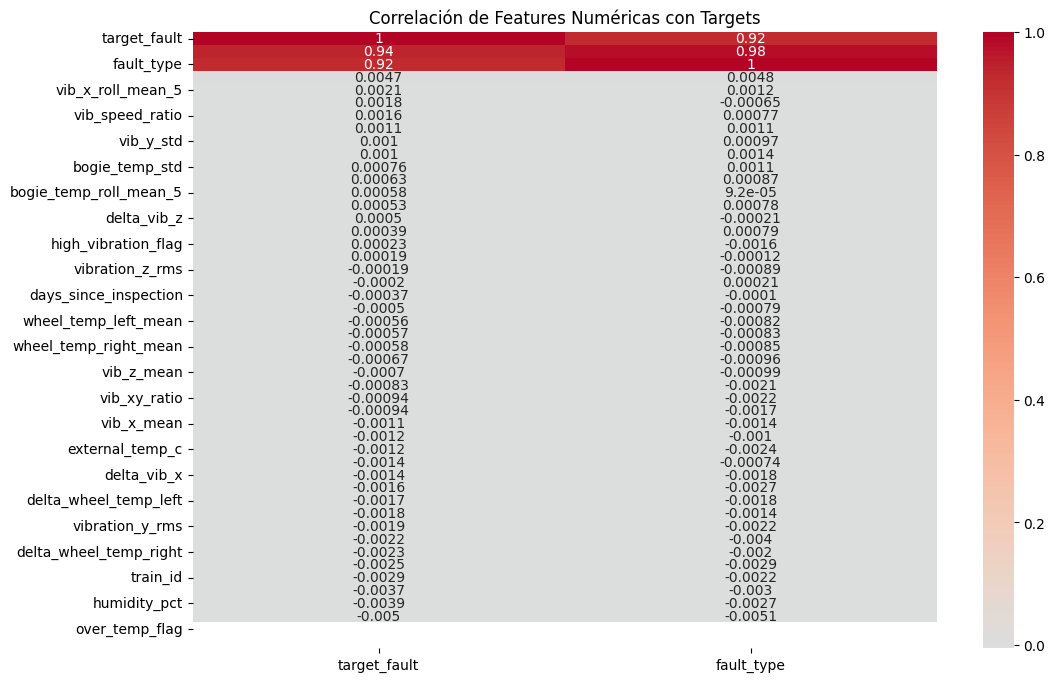

Correlaciones Spearman con target_fault y fault_type:
                            target_fault  fault_type
target_fault                   1.000000    0.999966
alarm_level                    0.999976    0.999991
fault_type                     0.999966    1.000000
bogie_wheel_temp_diff          0.003577    0.003580
vib_z_std                      0.001360    0.001363
days_since_inspection          0.001058    0.001068
inspection_to_maint_ratio      0.001058    0.001068
days_since_last_maint          0.001049    0.001059
vib_y_std                      0.000997    0.000999
wheel_temp_right_std           0.000861    0.000859
bogie_temp_roll_mean_5         0.000572    0.000568
vib_load_ratio                 0.000561    0.000544
bogie_id                       0.000399    0.000408
vib_speed_ratio                0.000396    0.000388
vib_xz_ratio                   0.000267    0.000240
high_vibration_flag            0.000228    0.000189
vib_x_roll_mean_5             -0.000031   -0.000032
bogie_tem

In [29]:
# Seleccionamos solo columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculamos la correlación
corr_matrix = df[numeric_cols].corr()

# Correlaciones con target_fault y fault_type
target_corr = corr_matrix[['target_fault', 'fault_type']].sort_values(by='target_fault', ascending=False)
print("Correlaciones con target_fault y fault_type:\n", target_corr)

# Visualización heatmap
plt.figure(figsize=(12,8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlación de Features Numéricas con Targets")
plt.show()

# Opcional: Correlación de tipo Spearman para capturar tendencias no lineales
spearman_corr = df[numeric_cols].corr(method='spearman')
spearman_target_corr = spearman_corr[['target_fault', 'fault_type']].sort_values(by='target_fault', ascending=False)
print("Correlaciones Spearman con target_fault y fault_type:\n", spearman_target_corr)

### 📌 Preparación de datos para RUL

**Objetivo:**  
Crear un target continuo `RUL` (Remaining Useful Life) que indique cuánto tiempo queda hasta que un bogie falle.  

**Método:**  
1. Ordenamos los registros por `bogie_id` y `timestamp`.  
2. Para cada bogie:  
   - Identificamos las filas donde `target_fault = 1`.  
   - Calculamos el tiempo restante hasta el siguiente fallo para cada fila.  
   - Si un bogie no tiene fallo posterior, se asigna un valor máximo (por ejemplo, 999).  

**Consideraciones:**  
- Esto convierte el problema de clasificación en **regresión continua**.  
- Las features existentes (temperaturas, vibraciones, flags) se usarán como predictores.  
- La unidad de RUL puede ser en minutos, horas o días según la granularidad de tu `timestamp`.  


In [31]:
# 1. Ordenar por tren, bogie y tiempo
df = df.sort_values(by=['train_id', 'bogie_id', 'timestamp']).reset_index(drop=True)

# 2. Función RUL en número de muestras hasta fallo
def calc_rul_steps(group):
    # Usamos posición relativa dentro del grupo
    n = len(group)
    idx_array = group.index.to_numpy()

    # Posiciones relativas donde hay fallo
    fault_pos = [i for i, idx in enumerate(idx_array) if group.loc[idx, 'target_fault'] == 1]

    # Inicializamos con un valor grande
    rul = [999] * n
    next_fault_pos = n  # por defecto, como si no hubiera fallo por delante

    # Recorremos de atrás hacia delante en posición relativa
    for rel_pos in range(n - 1, -1, -1):
        if rel_pos in fault_pos:
            next_fault_pos = rel_pos
        rul[rel_pos] = max(0, next_fault_pos - rel_pos)

    group['RUL_steps'] = rul
    return group

# 3. Aplicar por tren y bogie
df = df.groupby(['train_id', 'bogie_id'], group_keys=False).apply(calc_rul_steps)

# 4. Comprobación rápida
df[['train_id', 'bogie_id', 'timestamp', 'target_fault', 'RUL_steps']].head(30)
# 5. RUL en TIEMPO REAL (horas y días)
def calc_rul_time(group):
    group = group.sort_values('timestamp')
    timestamps = group['timestamp'].values
    fault_indices = group[group['target_fault'] == 1].index.tolist()
    
    n = len(group)
    rul_time = [pd.NaT] * n  # Not a Time por defecto
    next_fault_time = None
    
    # Recorremos de atrás hacia delante
    for i in range(n-1, -1, -1):
        current_ts = timestamps[i]
        if i in fault_indices:
            next_fault_time = current_ts
        if next_fault_time is not None:
            rul_time[i] = next_fault_time - current_ts
    
    group['RUL_timedelta'] = rul_time    
    group['RUL_hours'] = group['RUL_timedelta'].apply(
        lambda x: x.total_seconds() / 3600.0 if pd.notna(x) else np.nan
    )
    group['RUL_days'] = group['RUL_timedelta'].apply(
        lambda x: x.total_seconds() / 86400.0 if pd.notna(x) else np.nan
    )
    
    return group

    
   

# Aplicar por tren y bogie
df = df.groupby(['train_id', 'bogie_id'], group_keys=False).apply(calc_rul_time)

# 6. Comprobación
print("Estadísticas RUL_time:")
print("RUL_hours:", df['RUL_hours'].describe())
print("RUL_days:", df['RUL_days'].describe())
print("\nMuestra:")
print(df[['train_id', 'bogie_id', 'timestamp', 'target_fault', 
          'RUL_steps', 'RUL_hours', 'RUL_days']].head(15))




C:\Users\Sergio\AppData\Local\Temp\ipykernel_22148\2035781588.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['train_id', 'bogie_id'], group_keys=False).apply(calc_rul_steps)


Estadísticas RUL_time:
RUL_hours: count     494.000000
mean     1031.082321
std       874.333124
min         0.000000
25%       360.145833
50%       703.675000
75%      1591.441667
max      3243.483333
Name: RUL_hours, dtype: float64
RUL_days: count    494.000000
mean      42.961763
std       36.430547
min        0.000000
25%       15.006076
50%       29.319792
75%       66.310069
max      135.145139
Name: RUL_days, dtype: float64

Muestra:
    train_id  bogie_id           timestamp  target_fault  RUL_steps   RUL_hours   RUL_days
0          1         1 2024-01-01 04:38:00           0.0         23  266.933333  11.122222
1          1         1 2024-01-03 06:45:00           0.0         22  216.816667   9.034028
2          1         1 2024-01-03 17:45:00           0.0         21  205.816667   8.575694
3          1         1 2024-01-04 02:12:00           0.0         20  197.366667   8.223611
4          1         1 2024-01-04 15:34:00           0.0         19  184.000000   7.666667
5        

C:\Users\Sergio\AppData\Local\Temp\ipykernel_22148\2035781588.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['train_id', 'bogie_id'], group_keys=False).apply(calc_rul_time)


In [32]:
df.columns

Index(['timestamp', 'train_id', 'bogie_id', 'operation_mode', 'track_condition', 'curve_class', 'track_gradient', 'speed_kmh', 'load_tons', 'external_temp_c', 'humidity_pct', 'days_since_inspection',
       'vibration_x_rms', 'vibration_y_rms', 'vibration_z_rms', 'bogie_temp_c', 'wheel_temp_left_c', 'wheel_temp_right_c', 'bogie_health_score', 'fault_type', 'target_fault', 'alarm_level',
       'days_since_last_maint', 'vib_x_mean', 'vib_y_mean', 'vib_z_mean', 'vib_x_std', 'vib_y_std', 'vib_z_std', 'bogie_temp_mean', 'wheel_temp_left_mean', 'wheel_temp_right_mean', 'bogie_temp_std',
       'wheel_temp_left_std', 'wheel_temp_right_std', 'bogie_wheel_temp_diff', 'vib_xy_ratio', 'vib_xz_ratio', 'over_temp_flag', 'high_vibration_flag', 'delta_vib_x', 'delta_vib_y', 'delta_vib_z',
       'delta_bogie_temp', 'delta_wheel_temp_left', 'delta_wheel_temp_right', 'vib_x_roll_mean_5', 'bogie_temp_roll_mean_5', 'over_temp_duration', 'vib_load_ratio', 'vib_speed_ratio',
       'inspection_to_maint_ra

### Preparación de datos para RUL 

Vamos a preparar los datos para entrenar un modelo de regresión que prediga el **Remaining Useful Life (RUL)** usando las columnas seleccionadas en el dataset actual.

**Pasos a seguir:**

1. **Selección de features:**
   - **Continuas:** medidas físicas y derivadas:
     - Vibraciones: `vibration_x_rms`, `vibration_y_rms`, `vibration_z_rms`, `vib_x_mean`, `vib_y_mean`, `vib_z_mean`, `vib_x_std`, `vib_y_std`, `vib_z_std`, `delta_vib_x`, `delta_vib_y`, `delta_vib_z`, `vib_x_roll_mean_5`, `vib_load_ratio`, `vib_speed_ratio`
     - Temperaturas: `bogie_temp_c`, `wheel_temp_left_c`, `wheel_temp_right_c`, `bogie_temp_mean`, `wheel_temp_left_mean`, `wheel_temp_right_mean`, `bogie_temp_std`, `wheel_temp_left_std`, `wheel_temp_right_std`, `bogie_temp_roll_mean_5`, `delta_bogie_temp`, `delta_wheel_temp_left`, `delta_wheel_temp_right`
     - Otras: `track_gradient`, `speed_kmh`, `load_tons`, `external_temp_c`, `humidity_pct`, `bogie_health_score`, `over_temp_duration`, `inspection_to_maint_ratio`
   - **Categóricas:** `operation_mode`, `track_condition`, `curve_class`
   - **Flags/indicadores:** `alarm_level`, `over_temp_flag`, `high_vibration_flag`

2. **Separación de X e y:**
   - `X` contendrá todas las features seleccionadas.
   - `y` será la columna `RUL_steps`.

3. **Preprocesamiento:**
   - Escalado de variables continuas con `StandardScaler`.
   - Codificación de variables categóricas con `OneHotEncoder(sparse_output=False)`.

4. **Resultado:**
   - `X` listo para modelos de regresión.
   - `y` con valores de RUL.


In [35]:
# ----------------------------
# Features continuas
# ----------------------------
features_continuas = [
    'vibration_x_rms','vibration_y_rms','vibration_z_rms',
    'vib_x_mean','vib_y_mean','vib_z_mean','vib_x_std','vib_y_std','vib_z_std',
    'delta_vib_x','delta_vib_y','delta_vib_z','vib_x_roll_mean_5','vib_load_ratio','vib_speed_ratio',
    'bogie_temp_c','wheel_temp_left_c','wheel_temp_right_c',
    'bogie_temp_mean','wheel_temp_left_mean','wheel_temp_right_mean',
    'bogie_temp_std','wheel_temp_left_std','wheel_temp_right_std','bogie_temp_roll_mean_5',
    'delta_bogie_temp','delta_wheel_temp_left','delta_wheel_temp_right',
    'track_gradient','speed_kmh','load_tons','external_temp_c','humidity_pct',
    'bogie_health_score','over_temp_duration','inspection_to_maint_ratio'
]

# ----------------------------
# Features categóricas
# ----------------------------
features_categoricas = ['operation_mode', 'track_condition', 'curve_class']

# ----------------------------
# Flags / indicadores
# ----------------------------
features_flags = ['alarm_level','over_temp_flag','high_vibration_flag']

# ----------------------------
# ColumnTransformer
# ----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_continuas),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), features_categoricas)
    ],
    remainder='passthrough'  # Mantener flags sin escalar
)

# ----------------------------
# Aplicar preprocesamiento
# ----------------------------
X = preprocessor.fit_transform(df[features_continuas + features_categoricas + features_flags])
y = df['RUL_steps']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (197000, 49)
Shape de y: (197000,)


In [36]:
df.to_csv("../data/processed/bogie_rul_processed.csv", index=False)